## Sentiment Analysis of Reviews
### Ebru Dagdelen
12/6/2023

This project looks at reviews from 20 different businesses from Hackettstown, NJ. We aim to look at the sentiment
of the reviews and create a visualization to understand the overall sentiment.

#### Import necessary modules.

In [1]:
import requests
import yelpAPI  # file where client_id and api_key is defined with user's private app information
from textblob import TextBlob

#### Get API key.

In [2]:
APIKEY = yelpAPI.api_key
headers = {'Authorization': 'Bearer %s' % yelpAPI.api_key,}

#### Define get and search functions.

In [3]:
"""
Yelp Fusion API code sample.
This program demonstrates the capability of the Yelp Fusion API
by using the Search API to query for businesses by a search term and location,
and the Business API to query additional information about the top result
from the search query.
Please refer to https://docs.developer.yelp.com/docs/get-started for the API
documentation.
This program requires the Python requests library, which you can install via:
`pip install -r requirements.txt`.
Sample usage of the program:
`python sample.py --term="bars" --location="San Francisco, CA"`
"""
from __future__ import print_function

import argparse
import json
import pprint
import requests
import sys
import urllib


# This client code can run on Python 2.x or 3.x.  Your imports can be
# simpler if you only need one of those.
try:
    # For Python 3.0 and later
    from urllib.error import HTTPError
    from urllib.parse import quote
    from urllib.parse import urlencode
except ImportError:
    # Fall back to Python 2's urllib2 and urllib
    from urllib2 import HTTPError
    from urllib import quote
    from urllib import urlencode


# Yelp Fusion no longer uses OAuth as of December 7, 2017.
# You no longer need to provide Client ID to fetch Data
# It now uses private keys to authenticate requests (API Key)
# You can find it on
# https://www.yelp.com/developers/v3/manage_app
API_KEY= yelpAPI.api_key


# API constants, you shouldn't have to change these.
API_HOST = 'https://api.yelp.com'
SEARCH_PATH = '/v3/businesses/search'
BUSINESS_PATH = '/v3/businesses/'  # Business ID will come after slash.


# Defaults for our simple example.
DEFAULT_TERM = 'dinner'
SEARCH_LIMIT = 20


def request(host, path, api_key, url_params=None):
    """Given your API_KEY, send a GET request to the API.
    Args:
        host (str): The domain host of the API.
        path (str): The path of the API after the domain.
        API_KEY (str): Your API Key.
        url_params (dict): An optional set of query parameters in the request.
    Returns:
        dict: The JSON response from the request.
    Raises:
        HTTPError: An error occurs from the HTTP request.
    """
    url_params = url_params or {}
    url = '{0}{1}'.format(host, quote(path.encode('utf8')))
    headers = {
        'Authorization': 'Bearer %s' % api_key,
    }

    print(u'Querying {0} ...'.format(url))

    response = requests.request('GET', url, headers=headers, params=url_params)

    return response.json()


def search(api_key, term, location):
    """Query the Search API by a search term and location.
    Args:
        term (str): The search term passed to the API.
        location (str): The search location passed to the API.
    Returns:
        dict: The JSON response from the request.
    """

    url_params = {
        'term': term.replace(' ', '+'),
        'location': location.replace(' ', '+'),
        'limit': SEARCH_LIMIT
    }
    return request(API_HOST, SEARCH_PATH, api_key, url_params=url_params)

#### Search and get the response for restaurants in Hackettstown NJ.

In [4]:
response = search(API_KEY,DEFAULT_TERM, 'Hackettstown, NJ')

Querying https://api.yelp.com/v3/businesses/search ...


#### Get reviews from the response and do sentiment analysis on them.

In [5]:
positive = 0
negative = 0
neutral = 0
for business in response['businesses']:
    #print(response)
    print('Business Name: ' + business['name'])
    print('Rating: ' + str(business['rating']))
    print('Review Count: ' + str(business['review_count']))
    print('Reviews: ')
    BUS_REVIEW='/v3/businesses/{}/reviews'.format(business['id'])
    #print('https://api.yelp.com/v3/businesses/{}/reviews?limit=20&sort_by=yelp_sort'.format(business['id']))
    reviews = request(API_HOST,BUS_REVIEW, API_KEY)
    for review in reviews['reviews']:
        print(' - ' + review['text'])
        # Perform sentiment analysis on the review using TextBlob
        blob = TextBlob(review['text'])
        sentiment = blob.sentiment.polarity
        if sentiment > 0:
            print('    Sentiment: Positive')
            positive = positive + 1
        elif sentiment < 0:
            print('    Sentiment: Negative')
            negative = negative + 1
        else:
            print('    Sentiment: Neutral')
            neutral = neutral + 1
        print('\n================\n\n\n')

Business Name: James On Main
Rating: 4.5
Review Count: 301
Reviews: 
Querying https://api.yelp.com/v3/businesses/iWy237OhqzO0UhBMFM1mPA/reviews ...
 - Awesome food, friendly staff and great ambience!

Went with large group and everyone loved it!!!
    Sentiment: Positive




 - This is by far one of the best experiences in NJ. It's so much more than a restaurant with the gorgeous ambiance, friendly service, and spectacular food....
    Sentiment: Positive




 - Our very first visit and the special occasion was my wife's birthday.  We'll I can definitely say the Executive Chef ‍ and his team are outside the box....
    Sentiment: Positive




Business Name: Toscana Trattoria Ristorante Italiano
Rating: 4.5
Review Count: 124
Reviews: 
Querying https://api.yelp.com/v3/businesses/gT7zr9_Za71mG_fYLlFIHQ/reviews ...
 - Excellent food and great service.  Have never had a bad experience here.

Be careful ordering from daily specials as prices are not listed and very pricey...
    Sentiment: P

 - Friendly service in a homey environment. Our party of two ordered the small grill combo: the meat was seasoned very well and tasty; the portions were so...
    Sentiment: Positive




 - Decided to try a new BYO place.  Nice large menu with an emphasis on steak and seafood.   We enjoyed the garlic shrimp app - tasty sauce.   Saw another...
    Sentiment: Positive




 - We walked in around 2 PM on a Saturday on a fairly good weather day, considering that it is still March. We were greeted by staff immediately and allowed to...
    Sentiment: Positive




Business Name: Main Street Cafe
Rating: 4.0
Review Count: 56
Reviews: 
Querying https://api.yelp.com/v3/businesses/7xEHN-Ap1UcypD5XtvFFlQ/reviews ...
 - One of my favorite restaurants. Bakery, food and drinks are all amazing I've never gotten a bad order from them. Staff is always so friendly and the amount...
    Sentiment: Positive




 - I called following up on a grub hub order and the person handling my call was having a diffic

#### Visualize the results of the analysis.

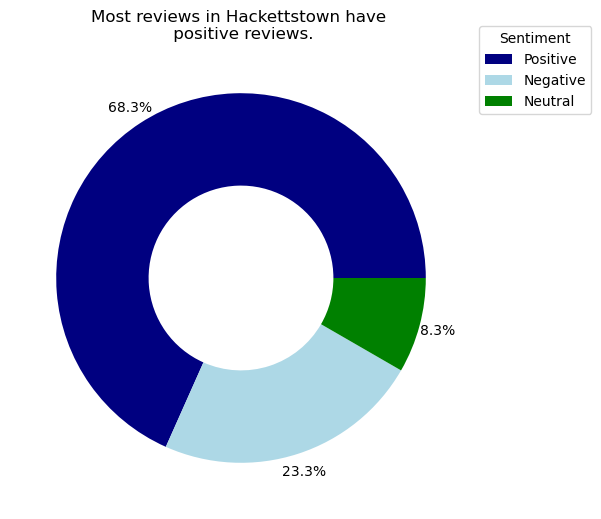

In [6]:
import seaborn as sns
import matplotlib.pyplot as plt

# Define data
labels = ['Positive', 'Negative', 'Neutral']
values = [positive, negative, neutral]

#Create donut chart
fig, ax = plt.subplots(figsize=(6, 6))
wedges, texts, autotexts = ax.pie(values, labels=None, wedgeprops=dict(width=0.5), autopct='%1.1f%%',pctdistance=1.1, colors=['navy', 'lightblue', 'green'])

#Add legend
ax.legend(wedges, labels, title='Sentiment', loc='center left', bbox_to_anchor=(1, 0, 0, 1.9))
ax.set_title('Most reviews in Hackettstown have \n positive reviews.')
plt.show()